title about whatever it is we are trying to find in this tutorial thing
==
----------------

*Insert a general introduction about the topic here*

To start off, we will need data about each champions lore and abilities. To do this, we can use the Riot Games [Static Data API](https://developer.riotgames.com/static-data.html). This API contains the champion data used by the League of Legends client, and has a JSON file for every champion in every patch. As of the writing of this tutorial, the latest patch is 8.24, so we will be using this to get our data. I have created an array with all the champions in the game as of now, and loop through it to get the JSON file containing the data for each champion, via a GET request to the Riot Games Static Data API. I then combine the data for each champion in a Pandas DataFrame object.

In [181]:
import requests
import pandas as pd 

champions = ["Aatrox","Ahri","Akali","Alistar","Amumu","Anivia","Annie","Ashe","AurelionSol","Azir","Bard","Blitzcrank","Brand",
"Braum","Caitlyn","Camille","Cassiopeia","Chogath","Corki","Darius","Diana","DrMundo","Draven","Ekko","Elise","Evelynn",
"Ezreal","Fiddlesticks","Fiora","Fizz","Galio","Gangplank","Garen","Gnar","Gragas","Graves","Hecarim","Heimerdinger",
"Illaoi","Irelia","Ivern","Janna","JarvanIV","Jax","Jayce","Jhin","Jinx","Kaisa","Kalista","Karma","Karthus","Kassadin",
"Katarina","Kayle","Kayn","Kennen","Khazix","Kindred","Kled","KogMaw","Leblanc","LeeSin","Leona","Lissandra","Lucian","Lulu",
"Lux","Malphite","Malzahar","Maokai","MasterYi","MissFortune","Mordekaiser","Morgana","Nami","Nasus","Nautilus","Neeko",
"Nidalee","Nocturne","Nunu","Olaf","Orianna","Ornn","Pantheon","Poppy","Pyke","Quinn","Rakan","Rammus","RekSai","Renekton",
"Rengar","Riven","Rumble","Ryze","Sejuani","Shaco","Shen","Shyvana","Singed","Sion","Sivir","Skarner","Sona","Soraka","Swain",
"Syndra","TahmKench","Taliyah","Talon","Taric","Teemo","Thresh","Tristana","Trundle","Tryndamere","TwistedFate","Twitch",
"Udyr","Urgot","Varus","Vayne","Veigar","Velkoz","Vi","Viktor","Vladimir","Volibear","Warwick","MonkeyKing","Xayah","Xerath",
"XinZhao","Yasuo","Yorick","Zac","Zed","Ziggs","Zilean","Zoe","Zyra" ]

ChampionsData = pd.DataFrame()
for champion in champions:
    url = "https://ddragon.leagueoflegends.com/cdn/8.24.1/data/en_US/champion/" + champion + ".json"
    r = requests.get(url)
    x = pd.DataFrame(r.json()['data']).T
    ChampionsData = ChampionsData.append(x)
ChampionsData.head()

,allytips,blurb,enemytips,id,image,info,key,lore,name,partype,passive,recommended,skins,spells,stats,tags,title
Aatrox,[Use Umbral Dash while casting The Darkin Blad...,Once honored defenders of Shurima against the ...,"[Aatrox's attacks are very telegraphed, so use...",Aatrox,"{'full': 'Aatrox.png', 'sprite': 'champion0.pn...","{'attack': 8, 'defense': 4, 'magic': 3, 'diffi...",266,Once honored defenders of Shurima against the ...,Aatrox,Blood Well,"{'name': 'Deathbringer Stance', 'description':...","[{'champion': 'Aatrox', 'title': 'AatroxARAM',...","[{'id': '266000', 'num': 0, 'name': 'default',...","[{'id': 'AatroxQ', 'name': 'The Darkin Blade',...","{'hp': 580, 'hpperlevel': 80, 'mp': 0, 'mpperl...","[Fighter, Tank]",the Darkin Blade
Ahri,"[Use Charm to set up your combos, it will make...",Innately connected to the latent power of Rune...,[Ahri's survivability is dramatically reduced ...,Ahri,"{'full': 'Ahri.png', 'sprite': 'champion0.png'...","{'attack': 3, 'defense': 4, 'magic': 8, 'diffi...",103,Innately connected to the latent power of Rune...,Ahri,Mana,"{'name': 'Vastayan Grace', 'description': 'Whe...","[{'champion': 'Ahri', 'title': 'AhriARAM', 'ma...","[{'id': '103000', 'num': 0, 'name': 'default',...","[{'id': 'AhriOrbofDeception', 'name': 'Orb of ...","{'hp': 526, 'hpperlevel': 92, 'mp': 418, 'mppe...","[Mage, Assassin]",the Nine-Tailed Fox
Akali,[Akali excels at killing fragile champions. Le...,Abandoning the Kinkou Order and her title of t...,[Akali can still be hit by area effect spells ...,Akali,"{'full': 'Akali.png', 'sprite': 'champion0.png...","{'attack': 5, 'defense': 3, 'magic': 8, 'diffi...",84,Abandoning the Kinkou Order and her title of t...,Akali,Energy,"{'name': 'Assassin's Mark', 'description': 'De...","[{'champion': 'Akali', 'title': 'AkaliARAM', '...","[{'id': '84000', 'num': 0, 'name': 'default', ...","[{'id': 'AkaliQ', 'name': 'Five Point Strike',...","{'hp': 550, 'hpperlevel': 85, 'mp': 200, 'mppe...",[Assassin],the Rogue Assassin
Alistar,[Using Pulverize can allow you to establish be...,Always a mighty warrior with a fearsome reputa...,[Alistar is very disruptive but very tough - t...,Alistar,"{'full': 'Alistar.png', 'sprite': 'champion0.p...","{'attack': 6, 'defense': 9, 'magic': 5, 'diffi...",12,Always a mighty warrior with a fearsome reputa...,Alistar,Mana,"{'name': 'Triumphant Roar', 'description': 'Al...","[{'champion': 'Alistar', 'title': 'AlistarARAM...","[{'id': '12000', 'num': 0, 'name': 'default', ...","[{'id': 'Pulverize', 'name': 'Pulverize', 'des...","{'hp': 573.36, 'hpperlevel': 106, 'mp': 278.84...","[Tank, Support]",the Minotaur
Amumu,"[Amumu is highly dependent on teammates, so tr...",Legend claims that Amumu is a lonely and melan...,[Avoid bunching up with other allies when Amum...,Amumu,"{'full': 'Amumu.png', 'sprite': 'champion0.png...","{'attack': 2, 'defense': 6, 'magic': 8, 'diffi...",32,Legend claims that Amumu is a lonely and melan...,Amumu,Mana,"{'name': 'Cursed Touch', 'description': 'Amumu...","[{'champion': 'Amumu', 'title': 'AmumuARAM', '...","[{'id': '32000', 'num': 0, 'name': 'default', ...","[{'id': 'BandageToss', 'name': 'Bandage Toss',...","{'hp': 613.12, 'hpperlevel': 84, 'mp': 287.2, ...","[Tank, Mage]",the Sad Mummy


Next, we want to clean up this table so it is easier to work with. 

The JSON files provided by the Riot Games Static Data API have a lot of data that we don't need, so I start by dropping the unnecessary columns.
Next, we will be needing the data for each ability, but those are currently all mashed together in a single column of the table, so I use the apply() method with a lambda function to map each ability from the spells column to a new column of the table. Afterwards, I delete the spells column, because it is now redundant. 

In [182]:
ChampionsData.set_index('key')
ChampionsData = ChampionsData.drop(columns=['allytips', 'blurb', 'enemytips','id','image','partype','recommended','skins','title'])
ChampionsData['Q'] = ChampionsData.apply(lambda row: row['spells'][0], axis = 1)
ChampionsData['W'] = ChampionsData.apply(lambda row: row['spells'][1], axis = 1)
ChampionsData['E'] = ChampionsData.apply(lambda row: row['spells'][2], axis = 1)
ChampionsData['R'] = ChampionsData.apply(lambda row: row['spells'][3], axis = 1)
ChampionsData = ChampionsData.drop(columns=['spells'])
ChampionsData.head(5)

,info,key,lore,name,passive,stats,tags,Q,W,E,R
Aatrox,"{'attack': 8, 'defense': 4, 'magic': 3, 'diffi...",266,Once honored defenders of Shurima against the ...,Aatrox,"{'name': 'Deathbringer Stance', 'description':...","{'hp': 580, 'hpperlevel': 80, 'mp': 0, 'mpperl...","[Fighter, Tank]","{'id': 'AatroxQ', 'name': 'The Darkin Blade', ...","{'id': 'AatroxW', 'name': 'Infernal Chains', '...","{'id': 'AatroxE', 'name': 'Umbral Dash', 'desc...","{'id': 'AatroxR', 'name': 'World Ender', 'desc..."
Ahri,"{'attack': 3, 'defense': 4, 'magic': 8, 'diffi...",103,Innately connected to the latent power of Rune...,Ahri,"{'name': 'Vastayan Grace', 'description': 'Whe...","{'hp': 526, 'hpperlevel': 92, 'mp': 418, 'mppe...","[Mage, Assassin]","{'id': 'AhriOrbofDeception', 'name': 'Orb of D...","{'id': 'AhriFoxFire', 'name': 'Fox-Fire', 'des...","{'id': 'AhriSeduce', 'name': 'Charm', 'descrip...","{'id': 'AhriTumble', 'name': 'Spirit Rush', 'd..."
Akali,"{'attack': 5, 'defense': 3, 'magic': 8, 'diffi...",84,Abandoning the Kinkou Order and her title of t...,Akali,"{'name': 'Assassin's Mark', 'description': 'De...","{'hp': 550, 'hpperlevel': 85, 'mp': 200, 'mppe...",[Assassin],"{'id': 'AkaliQ', 'name': 'Five Point Strike', ...","{'id': 'AkaliW', 'name': 'Twilight Shroud', 'd...","{'id': 'AkaliE', 'name': 'Shuriken Flip', 'des...","{'id': 'AkaliR', 'name': 'Perfect Execution', ..."
Alistar,"{'attack': 6, 'defense': 9, 'magic': 5, 'diffi...",12,Always a mighty warrior with a fearsome reputa...,Alistar,"{'name': 'Triumphant Roar', 'description': 'Al...","{'hp': 573.36, 'hpperlevel': 106, 'mp': 278.84...","[Tank, Support]","{'id': 'Pulverize', 'name': 'Pulverize', 'desc...","{'id': 'Headbutt', 'name': 'Headbutt', 'descri...","{'id': 'AlistarE', 'name': 'Trample', 'descrip...","{'id': 'FerociousHowl', 'name': 'Unbreakable W..."
Amumu,"{'attack': 2, 'defense': 6, 'magic': 8, 'diffi...",32,Legend claims that Amumu is a lonely and melan...,Amumu,"{'name': 'Cursed Touch', 'description': 'Amumu...","{'hp': 613.12, 'hpperlevel': 84, 'mp': 287.2, ...","[Tank, Mage]","{'id': 'BandageToss', 'name': 'Bandage Toss', ...","{'id': 'AuraofDespair', 'name': 'Despair', 'de...","{'id': 'Tantrum', 'name': 'Tantrum', 'descript...","{'id': 'CurseoftheSadMummy', 'name': 'Curse of..."


Now, for each champion we calculate a "CC Score". This score is calculated by scanning the tooltips for each ability of each champion, looking for keywords that relate to crowd-control. We use the following point values to calculate the score:

  Keyword  | Points
  ---------| -------------
  Supress  | 3
  Knock    | 3
  Stun     | 2.5
  Charm    | 2.5
  Snare    | 2
  Entangle | 2
  Taunt    | 1.5
  Pull     | 1.5
  Slow     | 1
  Silence  | 0.5
  
We only count the highest point keyword per ability, so an ability that both slows and knocks up will only get 3 points. Note that this score merely serves as a vague estimate. There are many inaccuracies as we can't know how difficult it is to perform the crowd control, the cost, or the number of champions it can affect at once. We only check that the ability has the capability of performing this crowd control. 


In [183]:
def getCCScore(champion):
    result = 0
    if('supress' in champion.loc['passive']['description']):
        result+=3
    elif('knock' in champion.loc['passive']['description']):
        result+=3
    elif('stun' in champion.loc['passive']['description'] or 'charm' in champion.loc['passive']['description'] ):
        result+=2.5
    elif('snare' in champion.loc['passive']['description'] or 'entangle' in champion.loc['passive']['description']):
        result+=2
    elif('taunt' in champion.loc['passive']['description'] or 'pull' in champion.loc['passive']['description']):
        result+=1.5
    elif('slow' in champion.loc['passive']['description']):
        result+=1
    elif('silence' in champion.loc['passive']['description']):
        result+=.5
    for ability in ['Q', 'W', 'E', 'R']:
        if('supress' in champion.loc[ability]['tooltip']):
            result+=3
        elif('knock' in champion.loc[ability]['tooltip']):
            result+=3
        elif('stun' in champion.loc[ability]['tooltip'] or 'charm' in champion.loc[ability]['tooltip'] ):
            result+=2.5
        elif('snare' in champion.loc[ability]['tooltip'] or 'entangle' in champion.loc[ability]['tooltip']):
            result+=2
        elif('taunt' in champion.loc[ability]['tooltip'] or 'pull' in champion.loc[ability]['tooltip']):
            result+=1.5
        elif('slow' in champion.loc[ability]['tooltip']):
            result+=1
        elif('silence' in champion.loc[ability]['tooltip']):
            result+=.5
    return result

ChampionsData['CC Score'] = ChampionsData.apply(lambda row: getCCScore(row), axis = 1)
ChampionsData['key'] = pd.to_numeric(ChampionsData['key'])
ChampionsData.head(5)

,info,key,lore,name,passive,stats,tags,Q,W,E,R,CC Score
Aatrox,"{'attack': 8, 'defense': 4, 'magic': 3, 'diffi...",266,Once honored defenders of Shurima against the ...,Aatrox,"{'name': 'Deathbringer Stance', 'description':...","{'hp': 580, 'hpperlevel': 80, 'mp': 0, 'mpperl...","[Fighter, Tank]","{'id': 'AatroxQ', 'name': 'The Darkin Blade', ...","{'id': 'AatroxW', 'name': 'Infernal Chains', '...","{'id': 'AatroxE', 'name': 'Umbral Dash', 'desc...","{'id': 'AatroxR', 'name': 'World Ender', 'desc...",4.0
Ahri,"{'attack': 3, 'defense': 4, 'magic': 8, 'diffi...",103,Innately connected to the latent power of Rune...,Ahri,"{'name': 'Vastayan Grace', 'description': 'Whe...","{'hp': 526, 'hpperlevel': 92, 'mp': 418, 'mppe...","[Mage, Assassin]","{'id': 'AhriOrbofDeception', 'name': 'Orb of D...","{'id': 'AhriFoxFire', 'name': 'Fox-Fire', 'des...","{'id': 'AhriSeduce', 'name': 'Charm', 'descrip...","{'id': 'AhriTumble', 'name': 'Spirit Rush', 'd...",2.5
Akali,"{'attack': 5, 'defense': 3, 'magic': 8, 'diffi...",84,Abandoning the Kinkou Order and her title of t...,Akali,"{'name': 'Assassin's Mark', 'description': 'De...","{'hp': 550, 'hpperlevel': 85, 'mp': 200, 'mppe...",[Assassin],"{'id': 'AkaliQ', 'name': 'Five Point Strike', ...","{'id': 'AkaliW', 'name': 'Twilight Shroud', 'd...","{'id': 'AkaliE', 'name': 'Shuriken Flip', 'des...","{'id': 'AkaliR', 'name': 'Perfect Execution', ...",3.5
Alistar,"{'attack': 6, 'defense': 9, 'magic': 5, 'diffi...",12,Always a mighty warrior with a fearsome reputa...,Alistar,"{'name': 'Triumphant Roar', 'description': 'Al...","{'hp': 573.36, 'hpperlevel': 106, 'mp': 278.84...","[Tank, Support]","{'id': 'Pulverize', 'name': 'Pulverize', 'desc...","{'id': 'Headbutt', 'name': 'Headbutt', 'descri...","{'id': 'AlistarE', 'name': 'Trample', 'descrip...","{'id': 'FerociousHowl', 'name': 'Unbreakable W...",8.0
Amumu,"{'attack': 2, 'defense': 6, 'magic': 8, 'diffi...",32,Legend claims that Amumu is a lonely and melan...,Amumu,"{'name': 'Cursed Touch', 'description': 'Amumu...","{'hp': 613.12, 'hpperlevel': 84, 'mp': 287.2, ...","[Tank, Mage]","{'id': 'BandageToss', 'name': 'Bandage Toss', ...","{'id': 'AuraofDespair', 'name': 'Despair', 'de...","{'id': 'Tantrum', 'name': 'Tantrum', 'descript...","{'id': 'CurseoftheSadMummy', 'name': 'Curse of...",4.5


Now we will start looking at some match data. We can get this by performing a GET request on champion.gg's API. First we will get the data and save it to a DataFrame called winrates. Since champion.gg stores separate data for each role for each champion, I do a groupby to keep only the highest winrate role for each champion. I then join the winrates table with ChampionsData, to add a new winrate column for each champion.

In [186]:
r = requests.get('http://api.champion.gg/v2/champions?elo=BRONZE&champData=winRate&limit=2000&api_key=aa2c48dbf711614fb6f00dc2827b119a')
x = r.json()
winrates = pd.DataFrame(x).sort_values(by=['championId'])
winrates=winrates.drop(columns=['banRate','elo','gamesPlayed','patch'])
winrates = winrates.groupby(['championId'])['winRate'].max().to_frame()
ChampionsData = ChampionsData.join(winrates, on='key')
ChampionsData.head()

,info,key,lore,name,passive,stats,tags,Q,W,E,R,CC Score,winRate
Aatrox,"{'attack': 8, 'defense': 4, 'magic': 3, 'diffi...",266,Once honored defenders of Shurima against the ...,Aatrox,"{'name': 'Deathbringer Stance', 'description':...","{'hp': 580, 'hpperlevel': 80, 'mp': 0, 'mpperl...","[Fighter, Tank]","{'id': 'AatroxQ', 'name': 'The Darkin Blade', ...","{'id': 'AatroxW', 'name': 'Infernal Chains', '...","{'id': 'AatroxE', 'name': 'Umbral Dash', 'desc...","{'id': 'AatroxR', 'name': 'World Ender', 'desc...",4.0,0.485863
Ahri,"{'attack': 3, 'defense': 4, 'magic': 8, 'diffi...",103,Innately connected to the latent power of Rune...,Ahri,"{'name': 'Vastayan Grace', 'description': 'Whe...","{'hp': 526, 'hpperlevel': 92, 'mp': 418, 'mppe...","[Mage, Assassin]","{'id': 'AhriOrbofDeception', 'name': 'Orb of D...","{'id': 'AhriFoxFire', 'name': 'Fox-Fire', 'des...","{'id': 'AhriSeduce', 'name': 'Charm', 'descrip...","{'id': 'AhriTumble', 'name': 'Spirit Rush', 'd...",2.5,0.520434
Akali,"{'attack': 5, 'defense': 3, 'magic': 8, 'diffi...",84,Abandoning the Kinkou Order and her title of t...,Akali,"{'name': 'Assassin's Mark', 'description': 'De...","{'hp': 550, 'hpperlevel': 85, 'mp': 200, 'mppe...",[Assassin],"{'id': 'AkaliQ', 'name': 'Five Point Strike', ...","{'id': 'AkaliW', 'name': 'Twilight Shroud', 'd...","{'id': 'AkaliE', 'name': 'Shuriken Flip', 'des...","{'id': 'AkaliR', 'name': 'Perfect Execution', ...",3.5,0.449523
Alistar,"{'attack': 6, 'defense': 9, 'magic': 5, 'diffi...",12,Always a mighty warrior with a fearsome reputa...,Alistar,"{'name': 'Triumphant Roar', 'description': 'Al...","{'hp': 573.36, 'hpperlevel': 106, 'mp': 278.84...","[Tank, Support]","{'id': 'Pulverize', 'name': 'Pulverize', 'desc...","{'id': 'Headbutt', 'name': 'Headbutt', 'descri...","{'id': 'AlistarE', 'name': 'Trample', 'descrip...","{'id': 'FerociousHowl', 'name': 'Unbreakable W...",8.0,0.488874
Amumu,"{'attack': 2, 'defense': 6, 'magic': 8, 'diffi...",32,Legend claims that Amumu is a lonely and melan...,Amumu,"{'name': 'Cursed Touch', 'description': 'Amumu...","{'hp': 613.12, 'hpperlevel': 84, 'mp': 287.2, ...","[Tank, Mage]","{'id': 'BandageToss', 'name': 'Bandage Toss', ...","{'id': 'AuraofDespair', 'name': 'Despair', 'de...","{'id': 'Tantrum', 'name': 'Tantrum', 'descript...","{'id': 'CurseoftheSadMummy', 'name': 'Curse of...",4.5,0.534207
Anivia,"{'attack': 1, 'defense': 4, 'magic': 10, 'diff...",34,Anivia is a benevolent winged spirit who endur...,Anivia,"{'name': 'Rebirth', 'description': 'Upon dying...","{'hp': 480, 'hpperlevel': 82, 'mp': 495, 'mppe...","[Mage, Support]","{'id': 'FlashFrost', 'name': 'Flash Frost', 'd...","{'id': 'Crystallize', 'name': 'Crystallize', '...","{'id': 'Frostbite', 'name': 'Frostbite', 'desc...","{'id': 'GlacialStorm', 'name': 'Glacial Storm'...",6.0,0.500000
Annie,"{'attack': 2, 'defense': 3, 'magic': 10, 'diff...",1,"Dangerous, yet disarmingly precocious, Annie i...",Annie,"{'name': 'Pyromania', 'description': 'After ca...","{'hp': 524, 'hpperlevel': 88, 'mp': 418, 'mppe...",[Mage],"{'id': 'AnnieQ', 'name': 'Disintegrate', 'desc...","{'id': 'AnnieW', 'name': 'Incinerate', 'descri...","{'id': 'AnnieE', 'name': 'Molten Shield', 'des...","{'id': 'AnnieR', 'name': 'Summon: Tibbers', 'd...",2.5,0.526074
Ashe,"{'attack': 7, 'defense': 3, 'magic': 2, 'diffi...",22,"Iceborn warmother of the Avarosan tribe, Ashe ...",Ashe,"{'name': 'Frost Shot', 'description': 'Ashe's ...","{'hp': 539, 'hpperlevel': 85, 'mp': 280, 'mppe...","[Marksman, Support]","{'id': 'AsheQ', 'name': 'Ranger's Focus', 'des...","{'id': 'Volley', 'name': 'Volley', 'descriptio...","{'id': 'AsheSpiritOfTheHawk', 'name': 'Hawksho...","{'id': 'EnchantedCrystalArrow', 'name': 'Encha...",3.5,0.514422
AurelionSol,"{'attack': 2, 'defense': 3, 'magic': 8, 'diffi...",136,Aurelion Sol once graced the vast emptiness of...,Aurelion Sol,"{'name': 'Center of the Universe', 'descriptio...","{'hp': 510, 'hpperlevel': 92, 'mp': 350, 'mppe...","[Mage, Fighter]","{'id': 'A

Using our new winrate column, we can plot CC Score against winrate to see that there is no correlation. 

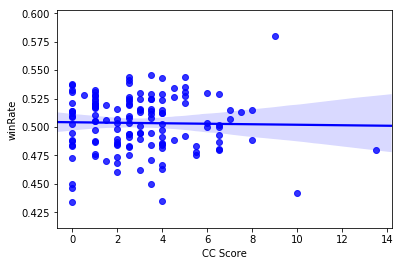

In [187]:
import seaborn as sns
sns.regplot(x='CC Score', y='winRate', data=ChampionsData, color ='blue')
